In [90]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# import networkx as nx
# import ndlib
import os
# import sys
# import future.utils
# import warnings
# from matplotlib import rc
mpl.rcParams["text.usetex"] = False
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


In [2]:
for filename in os.listdir("aggregate/"):
    if filename.startswith("averages media"):
        l = filename.split(' ')
        if l[2] == 'media':
            l.pop(2)
            s = ' '.join(l)
            try:
                os.rename('aggregate/{}'.format(filename), 'aggregate/{}'.format(s))
            except:
                continue

In [3]:
#create one aggregate file
aggrfile = open("aggregate/aggregate_results.csv", "w+")
header = "n,density,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster,std_ncluster,avg_pwdist,std_pwdist,avg_niter,std_niter\n"
aggrfile.write(header)
aggrfile.close()
aggrfile = open("aggregate/aggregate_results.csv", "a+")
for filename in os.listdir("aggregate/"):
    if filename.startswith("averages media"):
        infile = open("aggregate/{}".format(filename), "r")
        line = infile.readlines()
        s=','.join(line)
        s+='\n'
        aggrfile.write(s)
        infile.close()
aggrfile.close()

In [91]:
results = pd.read_csv("aggregate/aggregate_results.csv")
metrics = pd.read_csv("metrics/metrics [0.0].csv")

In [92]:
metrics.head()

eps   gam  gam_media  p_media media_op  avg_mean  avg_median   avg_std  \
0  0.1  0.00       0.00      0.0    [0.0]  0.502083    0.508237  0.280170   
1  0.1  0.25       0.25      0.0    [0.0]  0.498570    0.495239  0.281621   
2  0.1  0.50       0.50      0.0    [0.0]  0.498375    0.495562  0.284786   
3  0.1  0.75       0.75      0.0    [0.0]  0.495831    0.486480  0.283207   
4  0.1  1.00       1.00      0.0    [0.0]  0.503649    0.510633  0.285760   

   perc_extr  
0     0.0038  
1     0.0173  
2     0.0284  
3     0.0287  
4     0.0382

In [93]:
results.media_op.unique()

array(['0.05;0.5;0.95', '0.0', '[0.0]'], dtype=object)

In [94]:
results["media_op"].replace({"[0.0]": "0.0"}, inplace=True)

In [95]:
onemedia = results.loc[results['media_op']=="0.0"]
threemedia = results.loc[results['media_op']=='0.05;0.5;0.95']

In [96]:
print(len(onemedia))
onemedia.head()


252


n  density  eps   gam  gam_media  p_media   max_it media_op  \
28  100      1.0  0.1  0.00       0.00      0.0  1000000      0.0   
29  100      1.0  0.1  0.25       0.25      0.0  1000000      0.0   
30  100      1.0  0.1  0.50       0.50      0.0  1000000      0.0   
31  100      1.0  0.1  0.75       0.75      0.0  1000000      0.0   
32  100      1.0  0.1  1.00       1.00      0.0  1000000      0.0   

    avg_ncluster  std_ncluster  avg_pwdist  std_pwdist  avg_niter  std_niter  
28      4.193079      0.514941    0.155189    0.231954      79.00  32.993112  
29      5.545144      0.741015    0.158962    0.231165     116.83  65.535102  
30      5.807641      0.788472    0.161138    0.233473      53.53  30.279991  
31      6.061076      0.775240    0.160235    0.232106      25.56   8.595653  
32      6.232725      0.813376    0.161771    0.234117      20.07   5.251753

In [97]:
onemedia.p_media.unique()

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

In [98]:
#rifare i plot dal fisso e mettere le label in latex per paper
def heatmapsplot(results, measure, x, y, grouping):

    params = ['p_media', 'gam', 'gam_media', 'eps']
    paramsnames = ['p', '$\gamma$', '$\gamma_{media}$', '$\epsilon$']
    parmapping = dict(zip(params, paramsnames))

    sns.set_style("whitegrid")
    # sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    sns.set(font_scale=0.4)

    # mpl.rcParams["text.usetex"] = True
    # plt.rc('font',weight='bold',**{'family':'serif', 'size':6, 'serif':['Computer Modern Roman']})
    with sns.axes_style("whitegrid"):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 3.6), dpi=600)
        fmt = ".2f"
        if measure=='avg_niter':
            annot=False
        else:
            annot=True
        i = 0
        j = 0
        for val in results[grouping].unique():
            data = results[results[grouping] == val]
            df = data.pivot(x, y, measure)
            a=sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, ax= axes[j, i])
            a.set_yticklabels(a.get_yticklabels(), rotation = 0)
            a.set_xticklabels(a.get_xticklabels(), rotation = 0)
            axes[j, i].set_title('{}={}'.format(parmapping[grouping], val), fontsize=5)

            i+=1
            if i % 3 == 0:
                j += 1
                i=0

        for ax in axes.flat:
            ax.set_ylabel('')
            ax.set_xlabel('')
            # ax.set_xlabel(r'{}'.format(parmapping[y]), fontsize=10, labelpad=1)
            ax.tick_params(axis='x', which='major', pad=-2)
            ax.tick_params(axis='y', which='major', pad=-2)

        fig.text(0.00, 0.5, r'{}'.format(parmapping[x]), va='center', rotation='vertical', fontsize=8)
        fig.text(0.5, 0.0, r'{}'.format(parmapping[y]), va='center', rotation='horizontal', fontsize=8)

        # fig.text(0.18, -0.03, r"(a) $p=0.1$", ha='center', fontsize=10)
        # fig.text(0.51, -0.03, r"(b) $p=0.3$", ha='center', fontsize=10)
        # fig.text(0.83, -0.03, r"(c) $p=0.5$", ha='center', fontsize=10)

        cax = fig.add_axes([1.0, 0.3, 0.01, 0.6])
        cbar = fig.colorbar(a.get_children()[0], cax=cax, orientation="vertical")
        cbar.outline.set_visible(False)

        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(10)
        plt.tight_layout()    
        plt.savefig("plots/aggregate/hm media mo[0.0] {} groupedby_{}.png".format(measure, grouping))

In [99]:
#va aggiustata la posizione della colorbar
def trisurfplot(data, p):
    params = ['p_media', 'gam', 'gam_media', 'eps']
    paramsnames = ['p', '$\gamma$', '$\gamma_{media}$', '$\epsilon$']
    parmapping = dict(zip(params, paramsnames))
    with sns.axes_style("whitegrid"):
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.1), dpi=600, subplot_kw={'projection': '3d'})
        data = data[data['p_media'] == p]
        i=0
        for measure in ['avg_ncluster', 'avg_pwdist', 'avg_niter']:
            x='eps'
            y='gam'
            ax = axes[i]        
            ax.tick_params(axis='x', which='major', labelsize = 3, pad=-6, labelrotation=45)
            ax.set_xticks(list(data['eps'].unique()))
            ax.tick_params(axis='y', which='major', pad=-3, labelrotation=-35)
            ax.set_yticks(list(data['gam'].unique()))
            ax.tick_params(axis='z', which='major', pad=0) 
            ax.set_title('p={}'.format(p), fontsize=5)
            ax.set_ylabel(r'{}'.format(parmapping[y]), labelpad=-4)
            ax.set_xlabel(r'{}'.format(parmapping[x]), labelpad=-10)
            ax.margins(x=0.1, tight=True)
            surf = ax.plot_trisurf(data[x], data[y], data[measure], cmap=plt.get_cmap('RdBu_r'), linewidth=0.2)
            i += 1
        plt.savefig("plots/aggregate/trisurf media mo[0.0] p{}.png".format(p))
        # cax = fig.add_axes([1.0, 0.3, 0.01, 0.6])
        # cb = fig.colorbar(surf, cax=cax, shrink=0.5, aspect=50, orientation = 'vertical', pad=0.05)
        # cb.outline.set_visible(False)
        # cb.ax.tick_params()
        # plt.show()



In [100]:
ps = list(onemedia.p_media.unique())
measures = ['avg_ncluster', 'avg_pwdist', 'avg_niter']
measure_titles = ['Average number of clusters', 'Average pairwise distance', 'Average number of iterations']
titlemapping = dict(zip(measures, measure_titles))

In [101]:
params = ['p', 'gamma', 'gamma_media', 'epsilon']
paramsnames = [r'p', r'$\gamma$', r'$\gamma_{media}$', r'$\epsilon$']
parmapping = dict(zip(params, paramsnames))

In [102]:
metrics.head()

eps   gam  gam_media  p_media media_op  avg_mean  avg_median   avg_std  \
0  0.1  0.00       0.00      0.0    [0.0]  0.502083    0.508237  0.280170   
1  0.1  0.25       0.25      0.0    [0.0]  0.498570    0.495239  0.281621   
2  0.1  0.50       0.50      0.0    [0.0]  0.498375    0.495562  0.284786   
3  0.1  0.75       0.75      0.0    [0.0]  0.495831    0.486480  0.283207   
4  0.1  1.00       1.00      0.0    [0.0]  0.503649    0.510633  0.285760   

   perc_extr  
0     0.0038  
1     0.0173  
2     0.0284  
3     0.0287  
4     0.0382

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


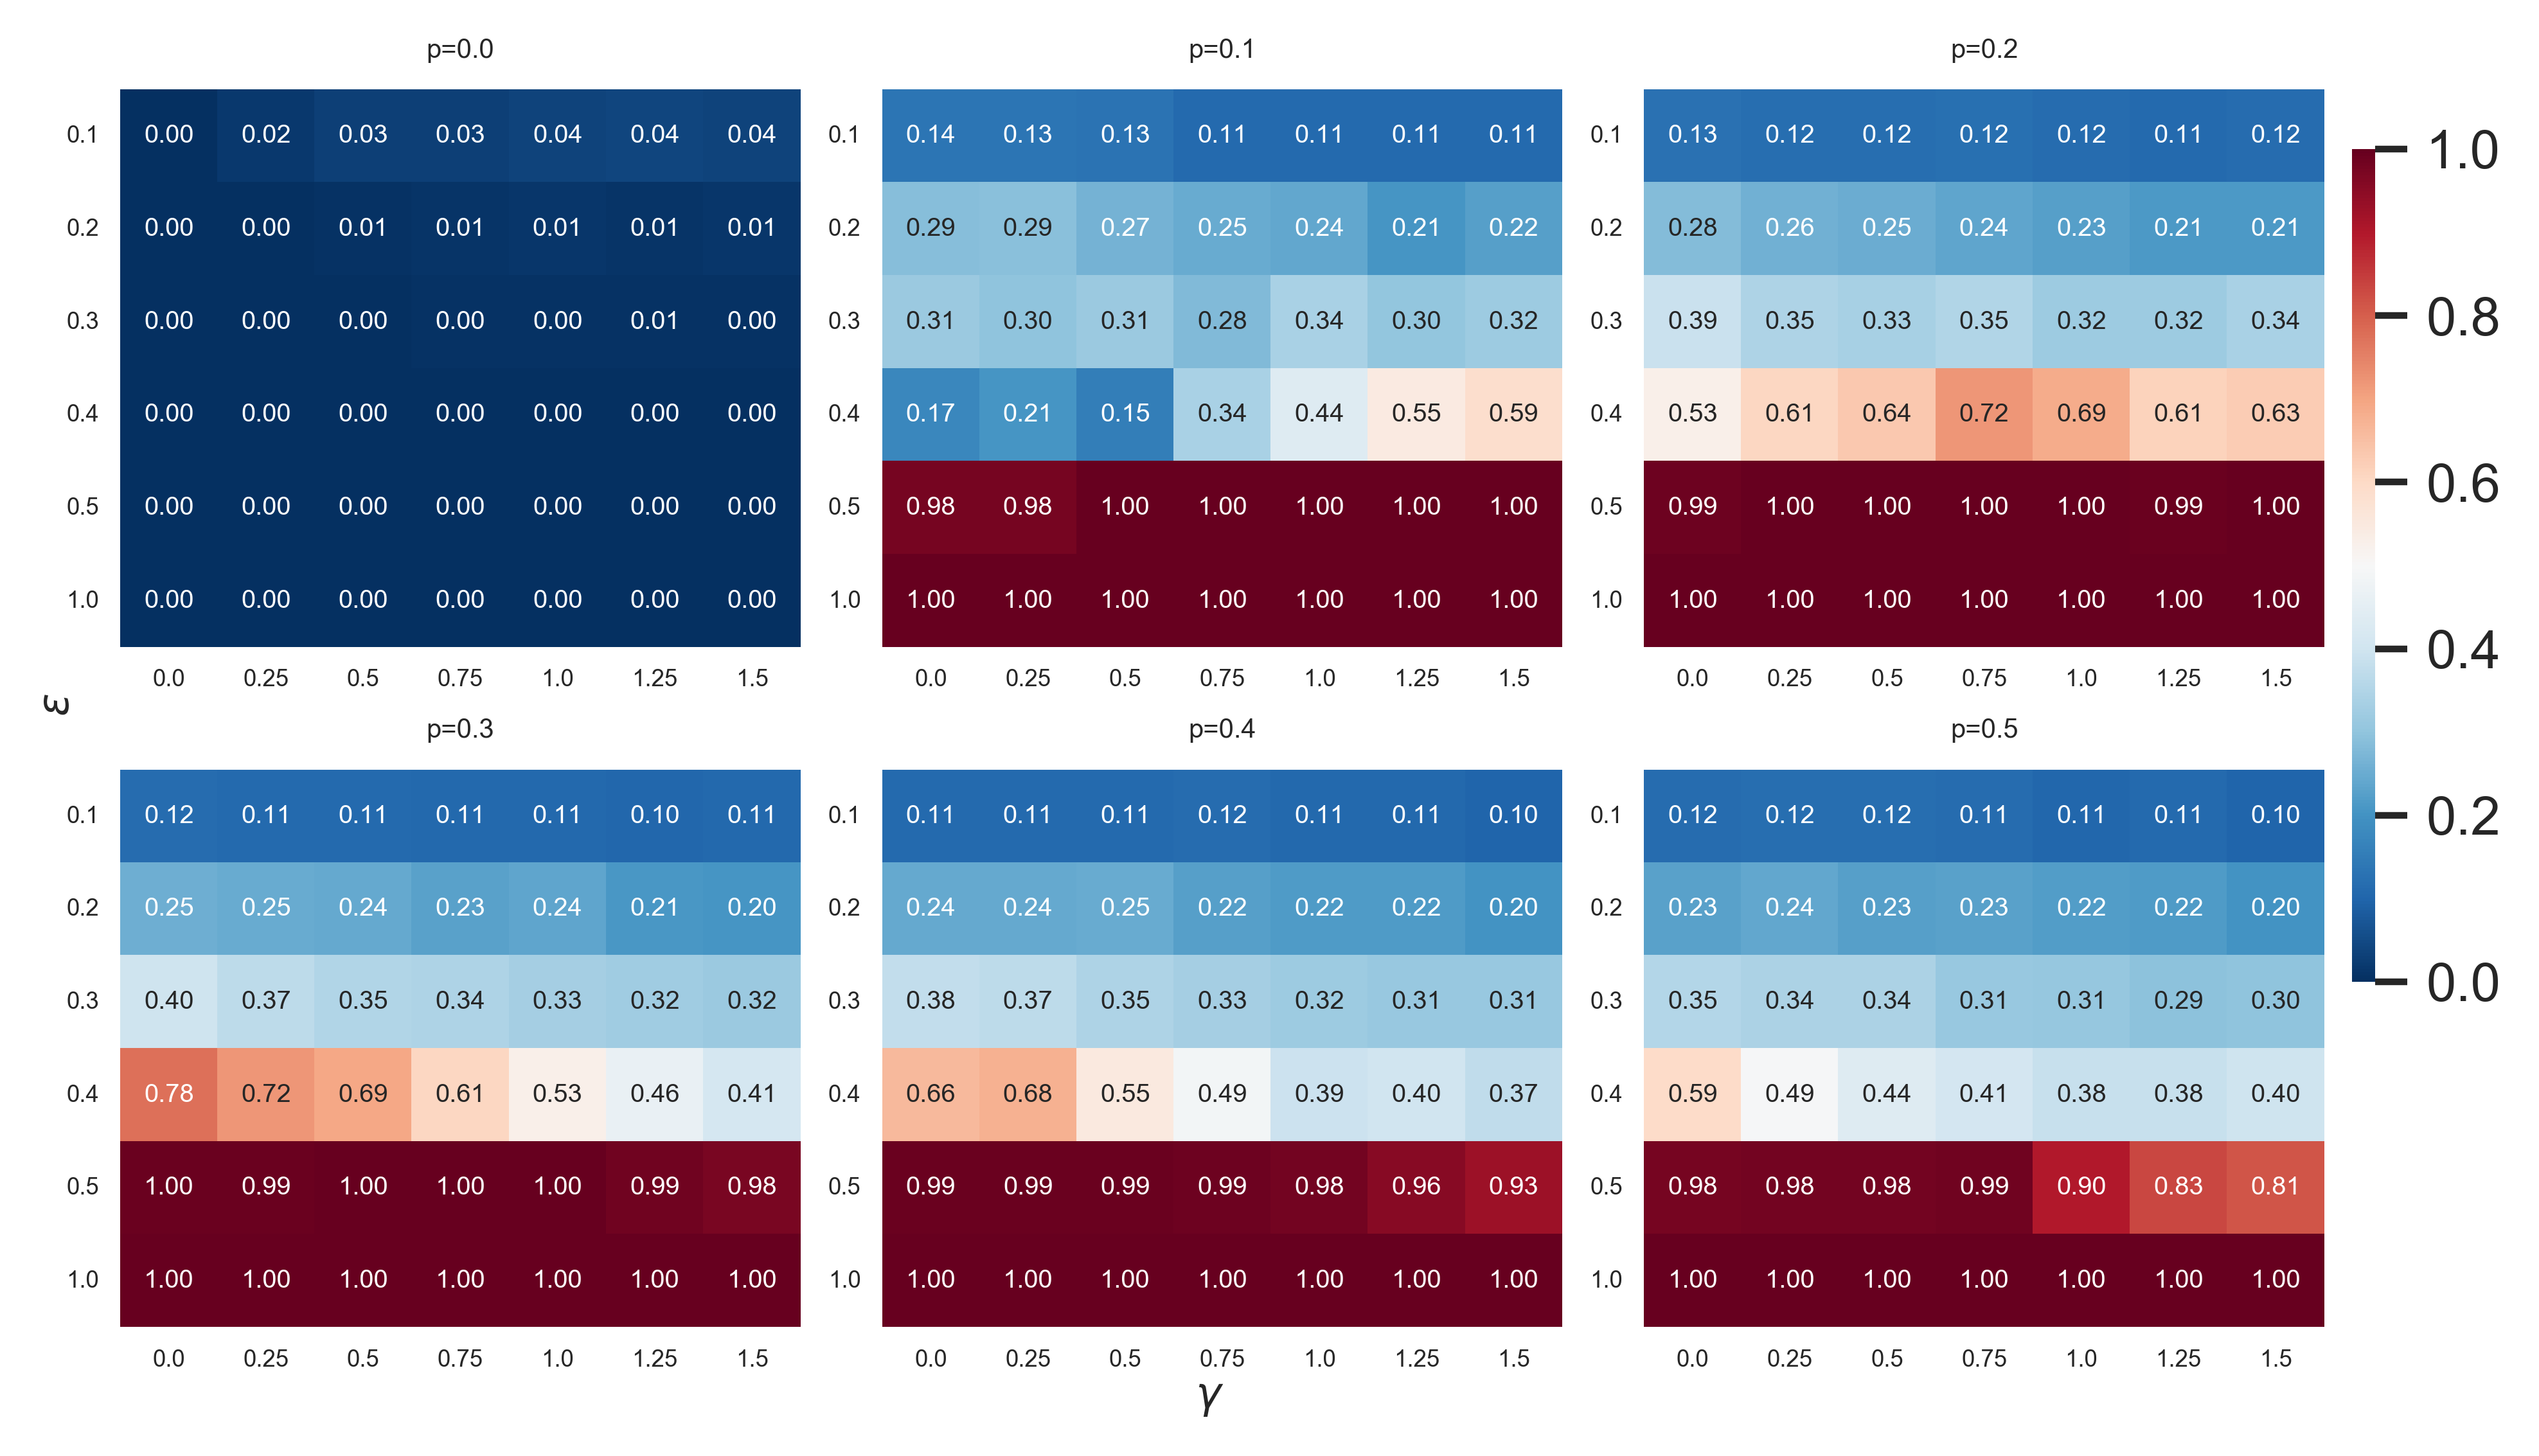

In [37]:
# measure = "avg_ncluster"
# filename = 'plots/aggregate/heatmap_{}_onemedia.png'.format(measure)
# threeheatmapsplot(onemedia, measure, filename)
heatmapsplot(metrics, "perc_extr", "eps", "gam", "p_media")

As we can see from these plots basically changing the probability of interacting with the media doesn't change anything when it comes to the number of clusters and the whole dynamics is governed by gamma. 
We can however see that while a 0.4 epsilon means consensus, raising the probability to interact with one media actually enhances fragmentation. 
Maybe we can fix epsilon and plot the number of clusters as a function of p and gamma. 

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


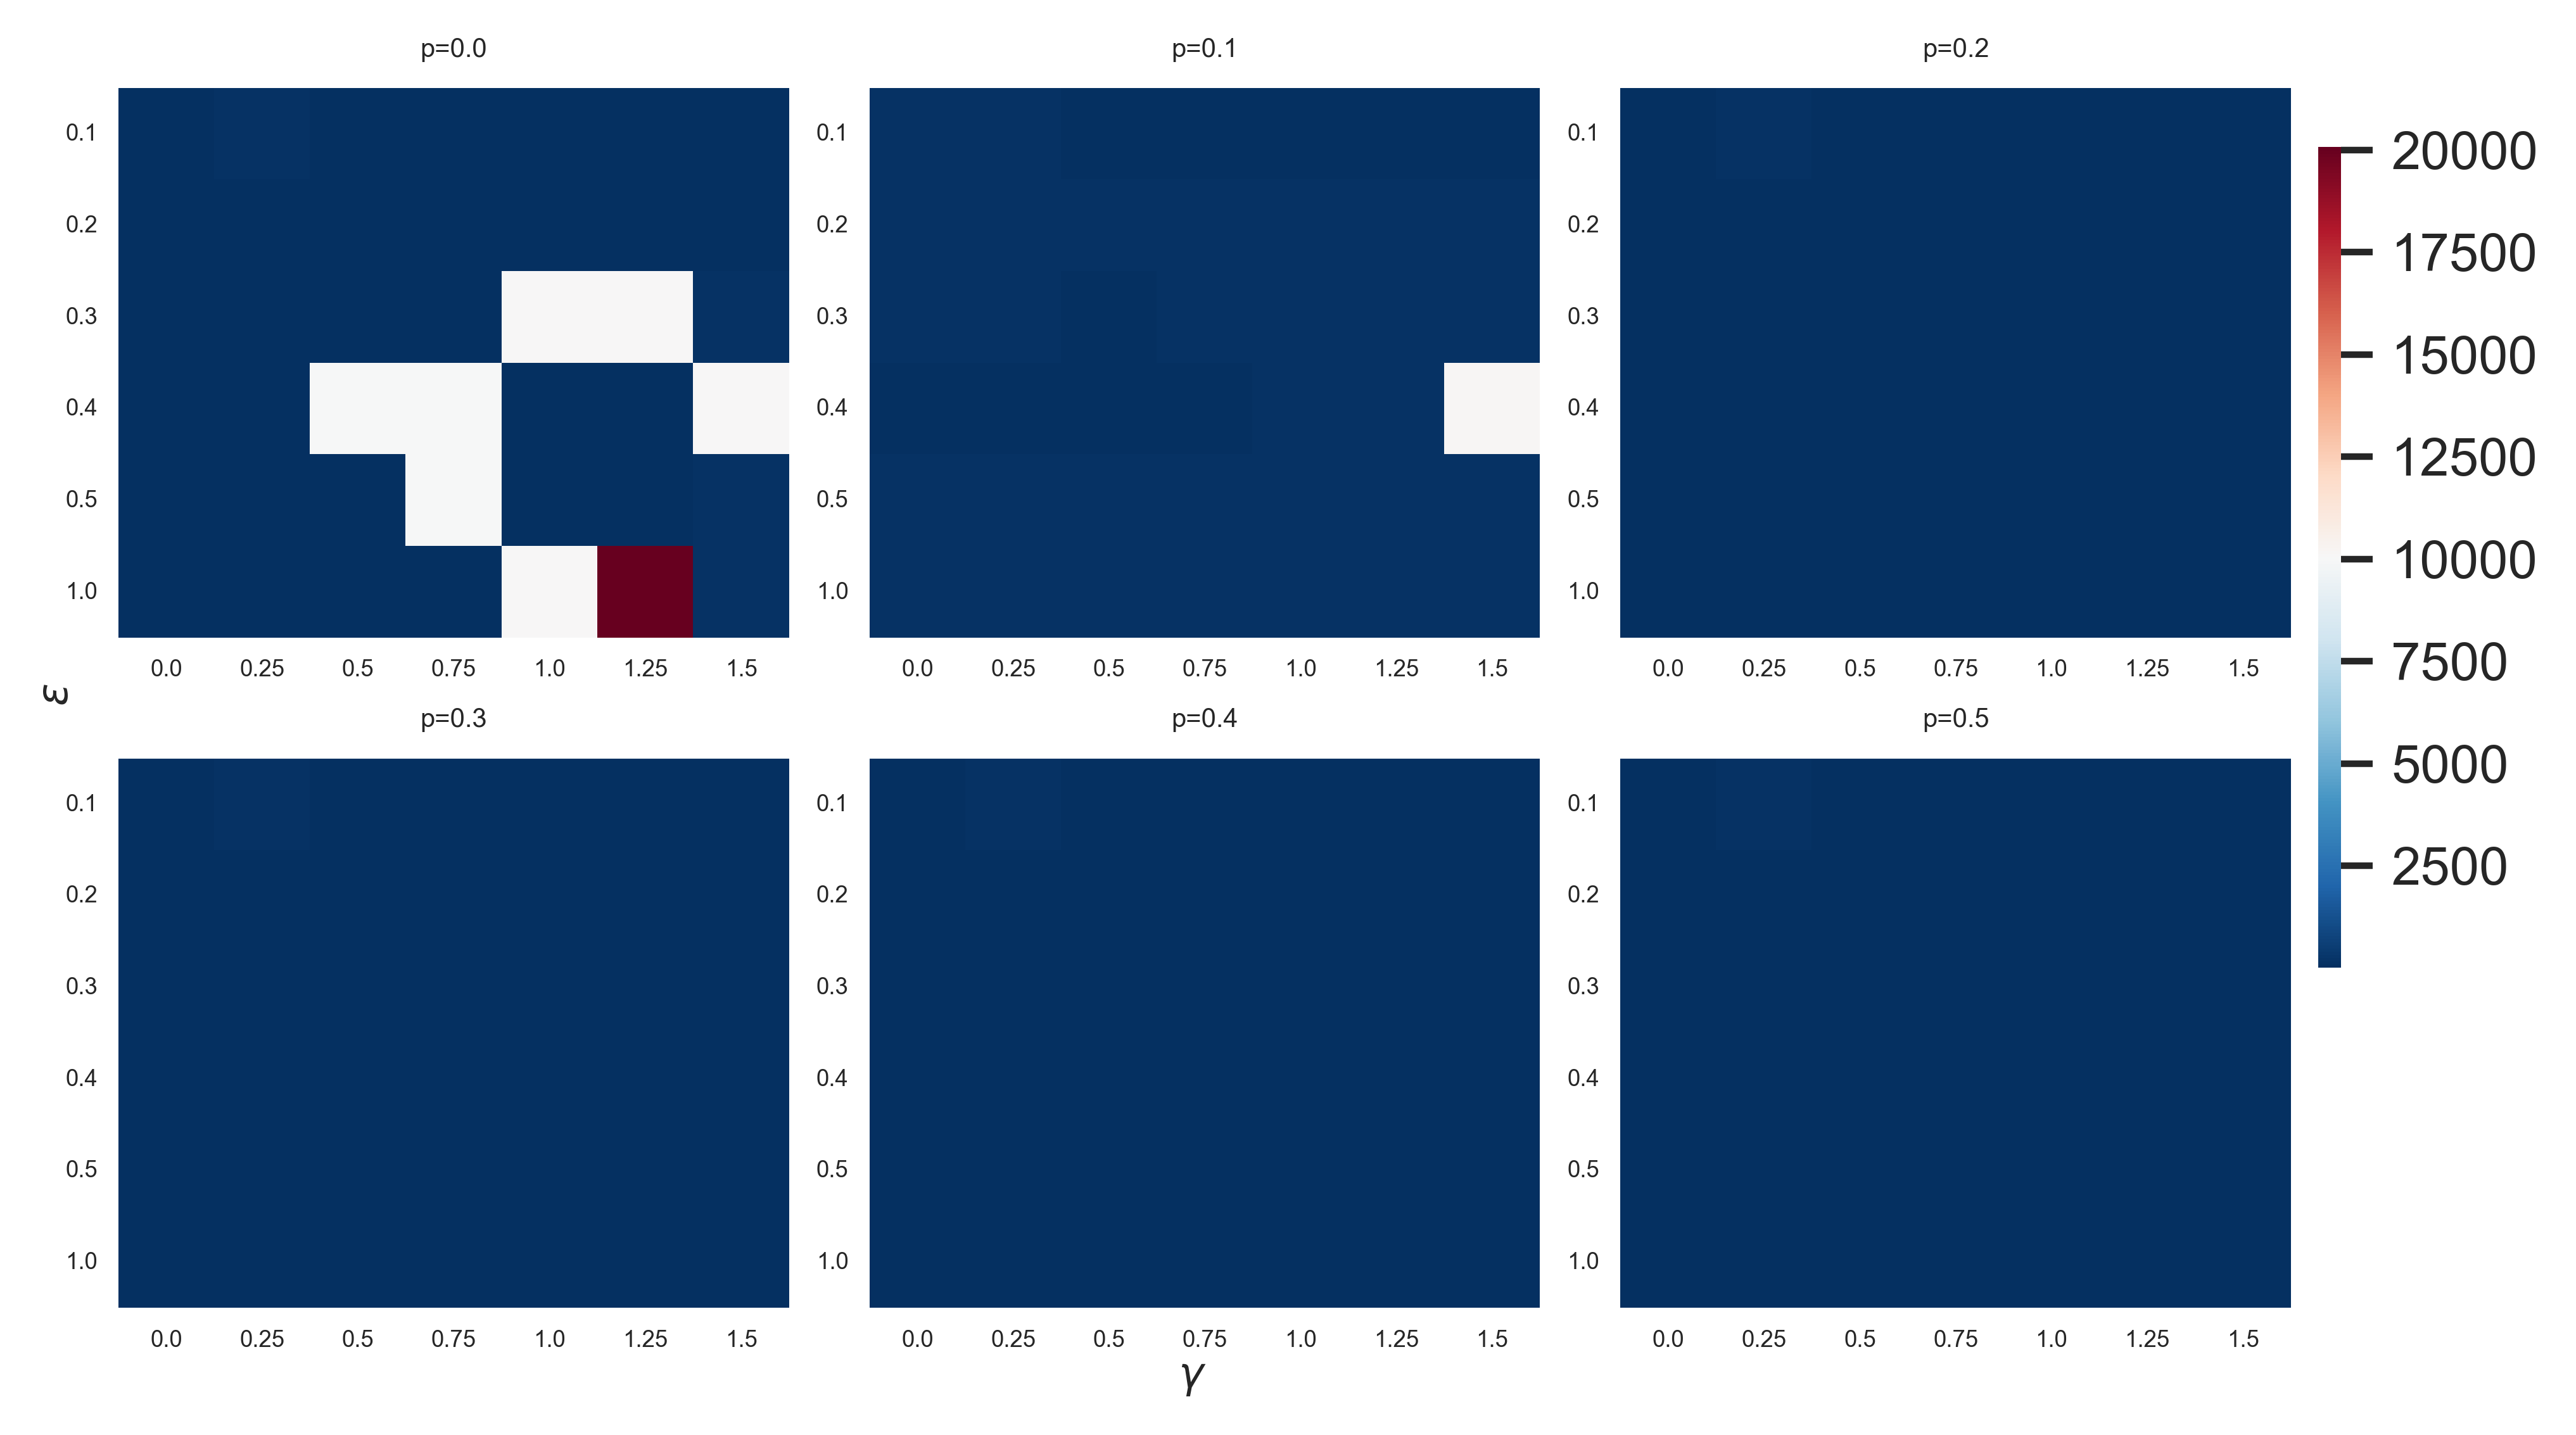

In [104]:
heatmapsplot(onemedia, "avg_niter", "eps", "gam", "p_media")

As we can see, fixed a confidence bound, a higher probability to interact with a media indeed means more fragmentation especially for intermediate values of the confidence bound like 0.3 and 0.4 where in principle we could have consensus but we obtain polarization even without algorithmic bias, just by interacting with that one stubborn agent which attracts a portion of the population and splits a cluster. 

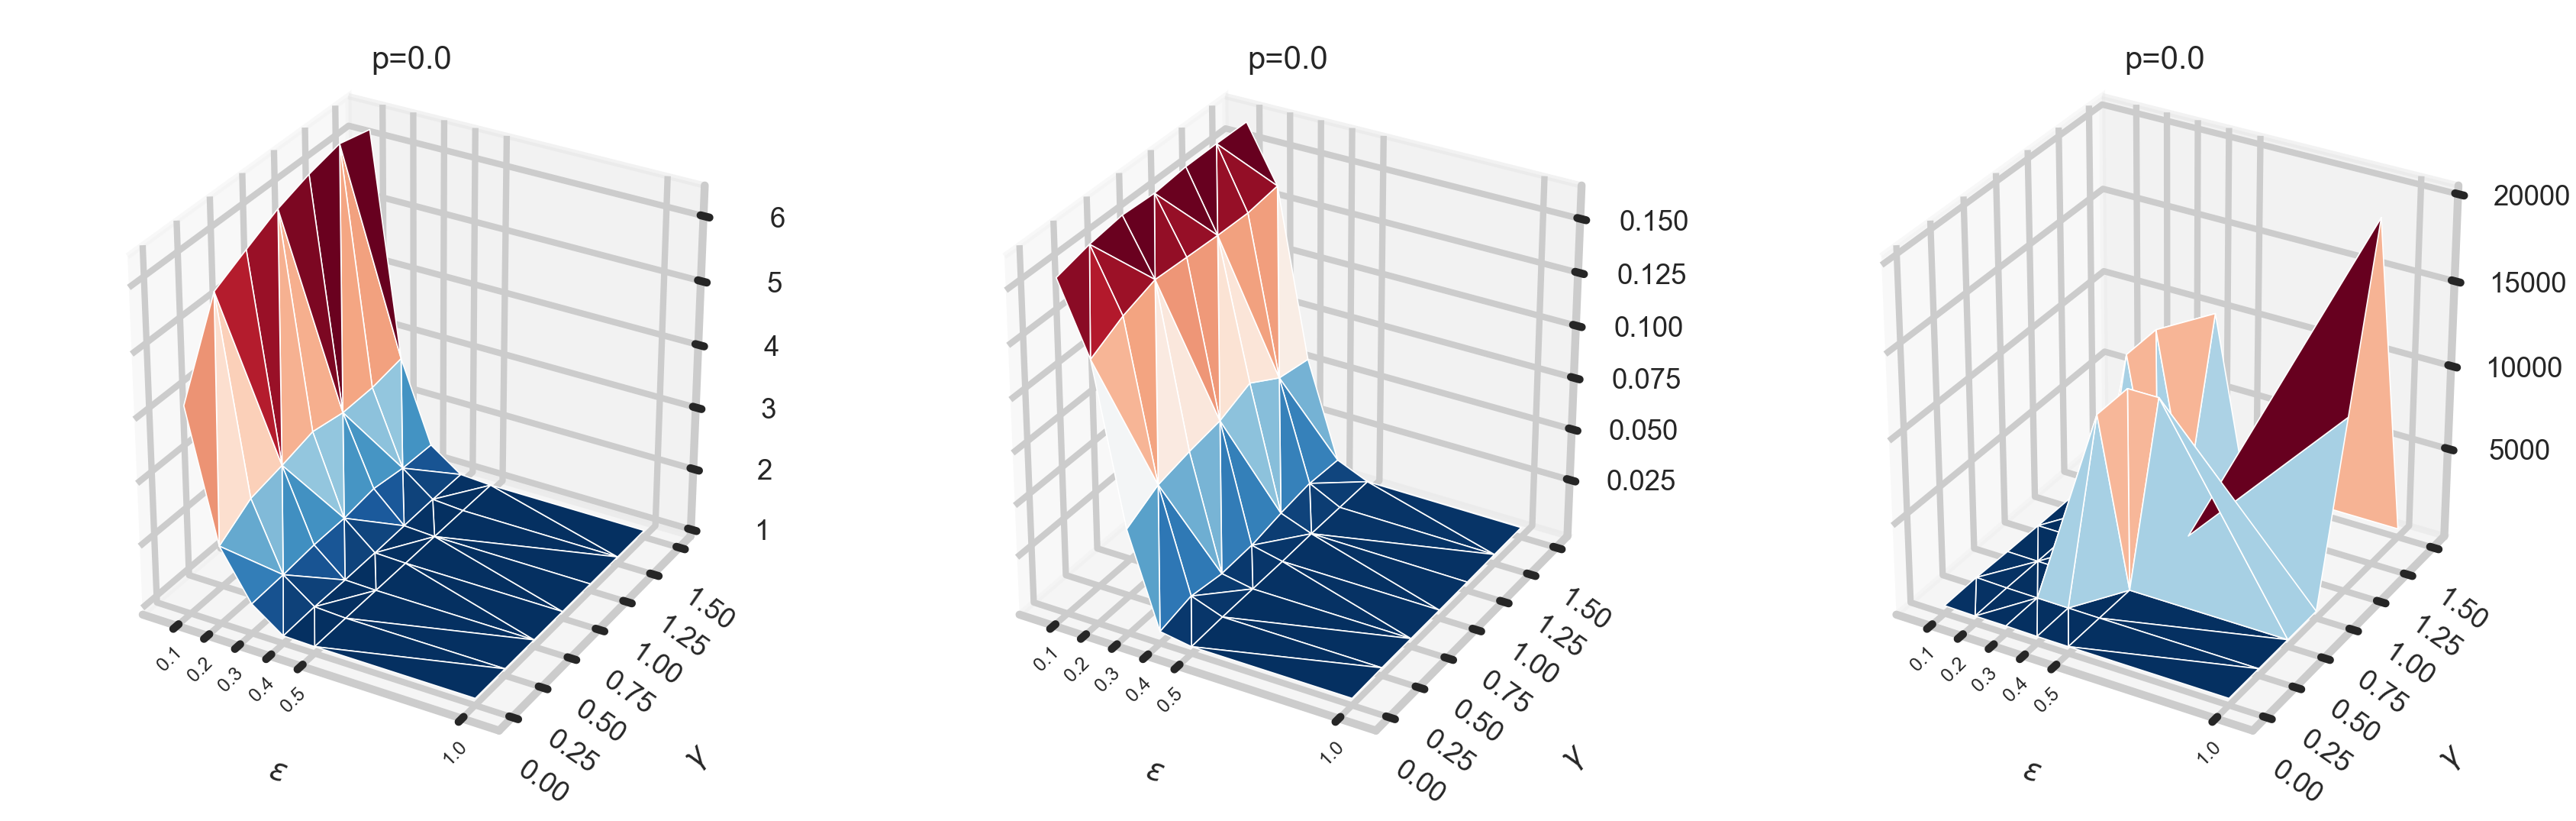

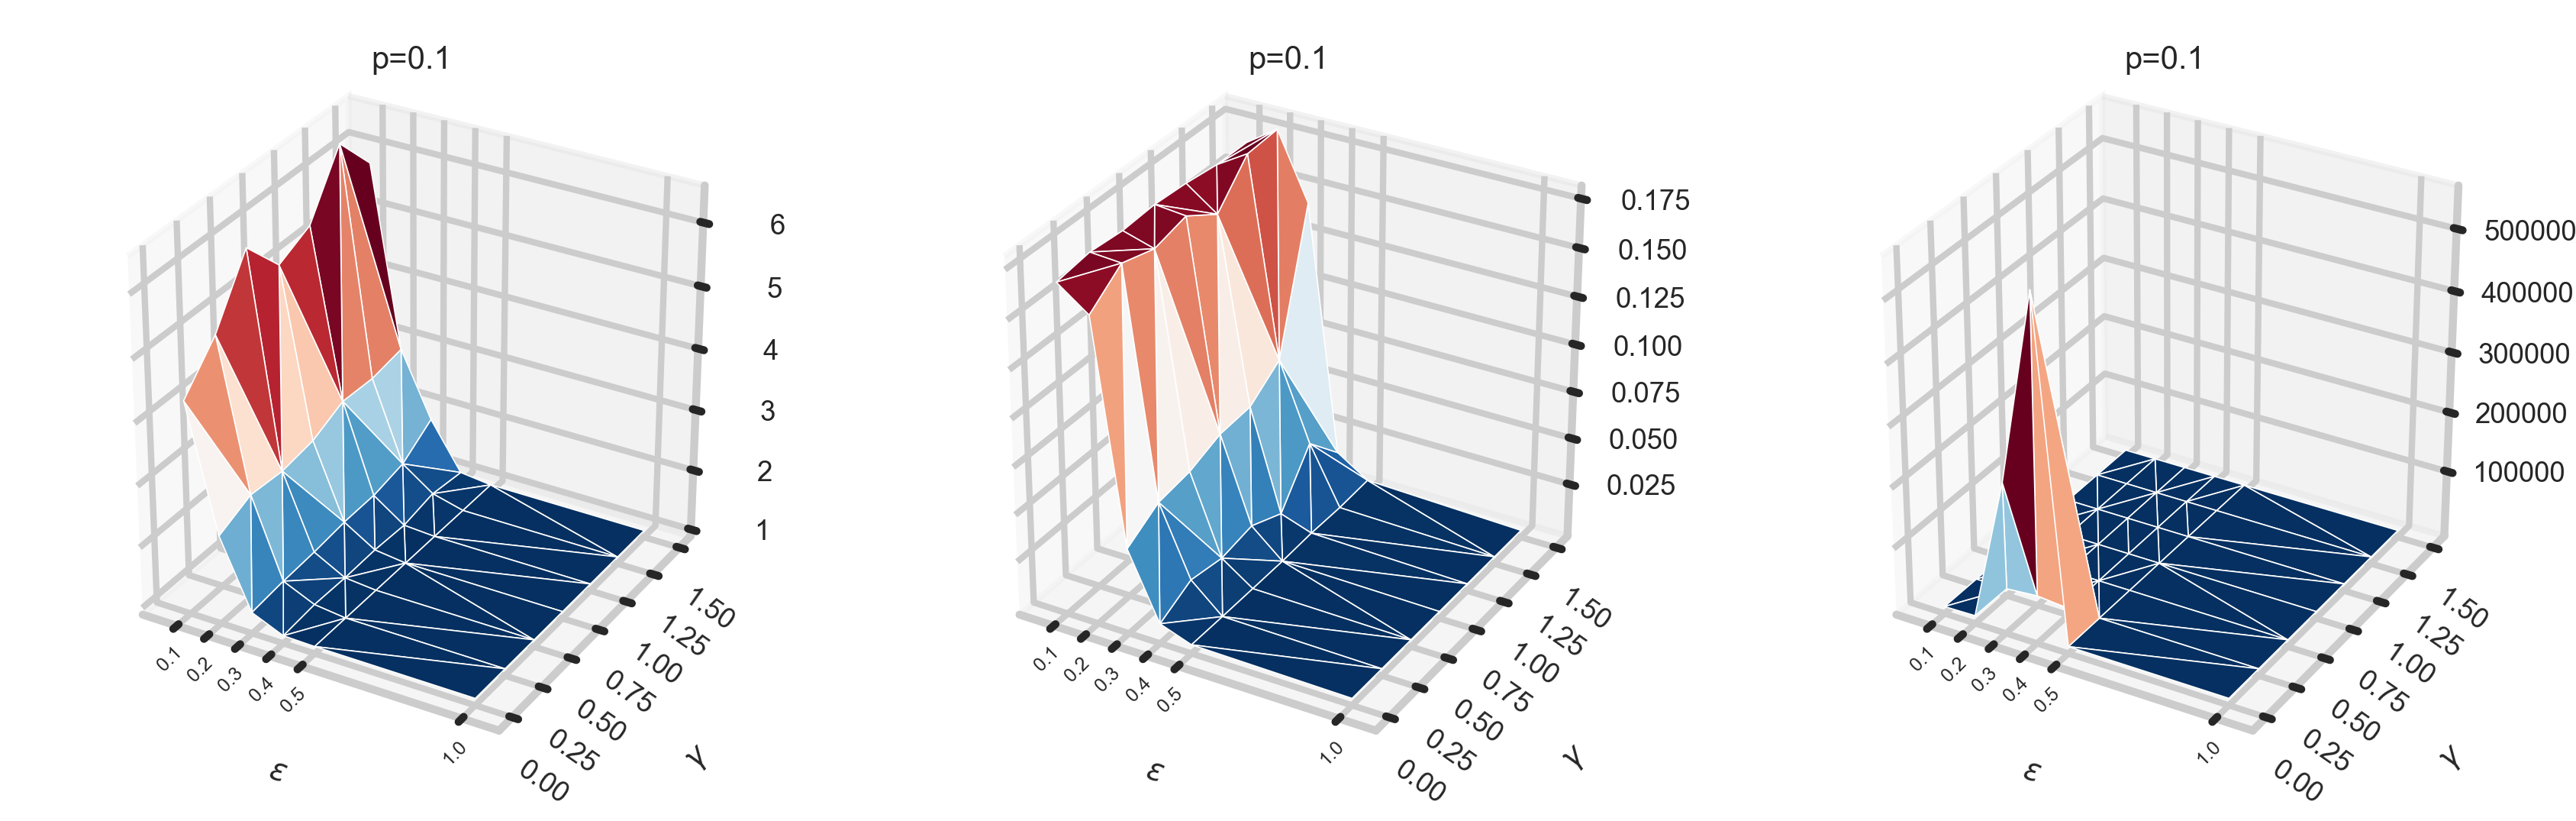

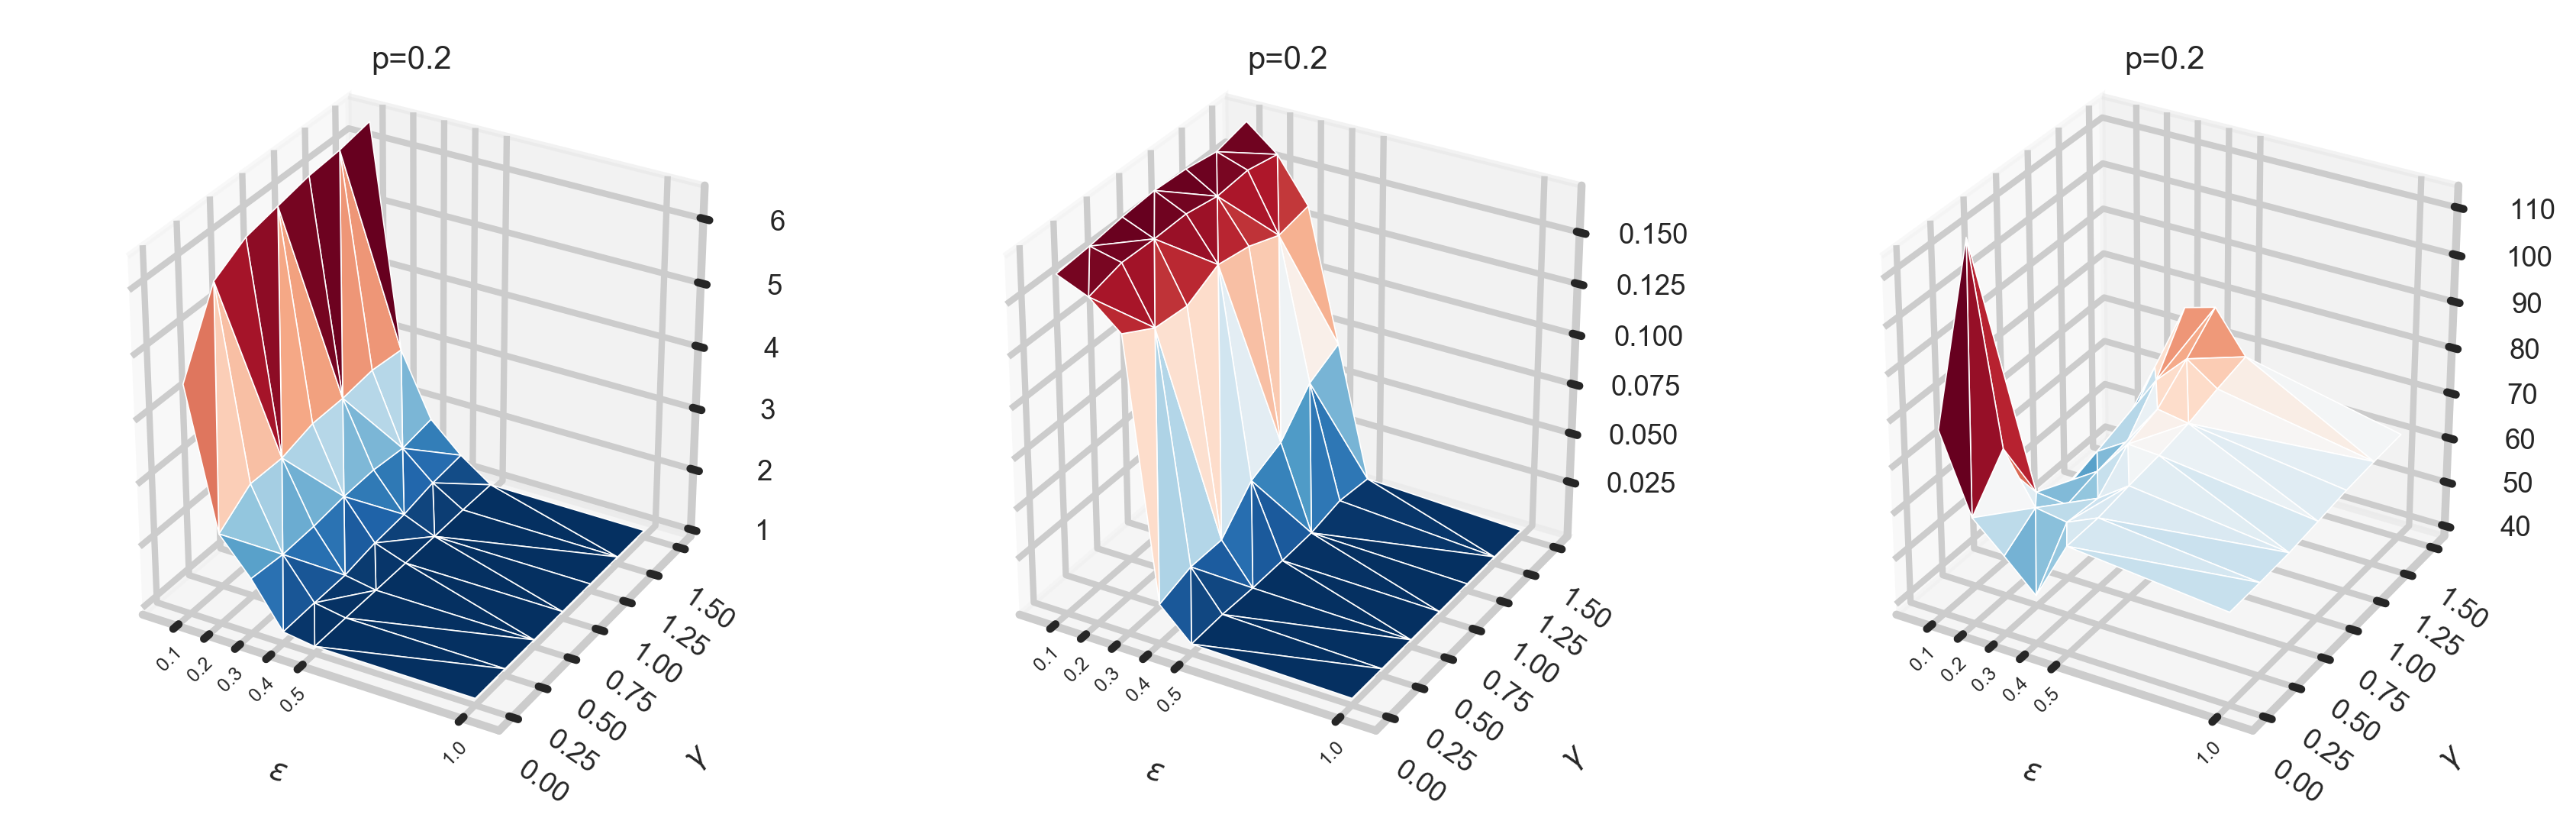

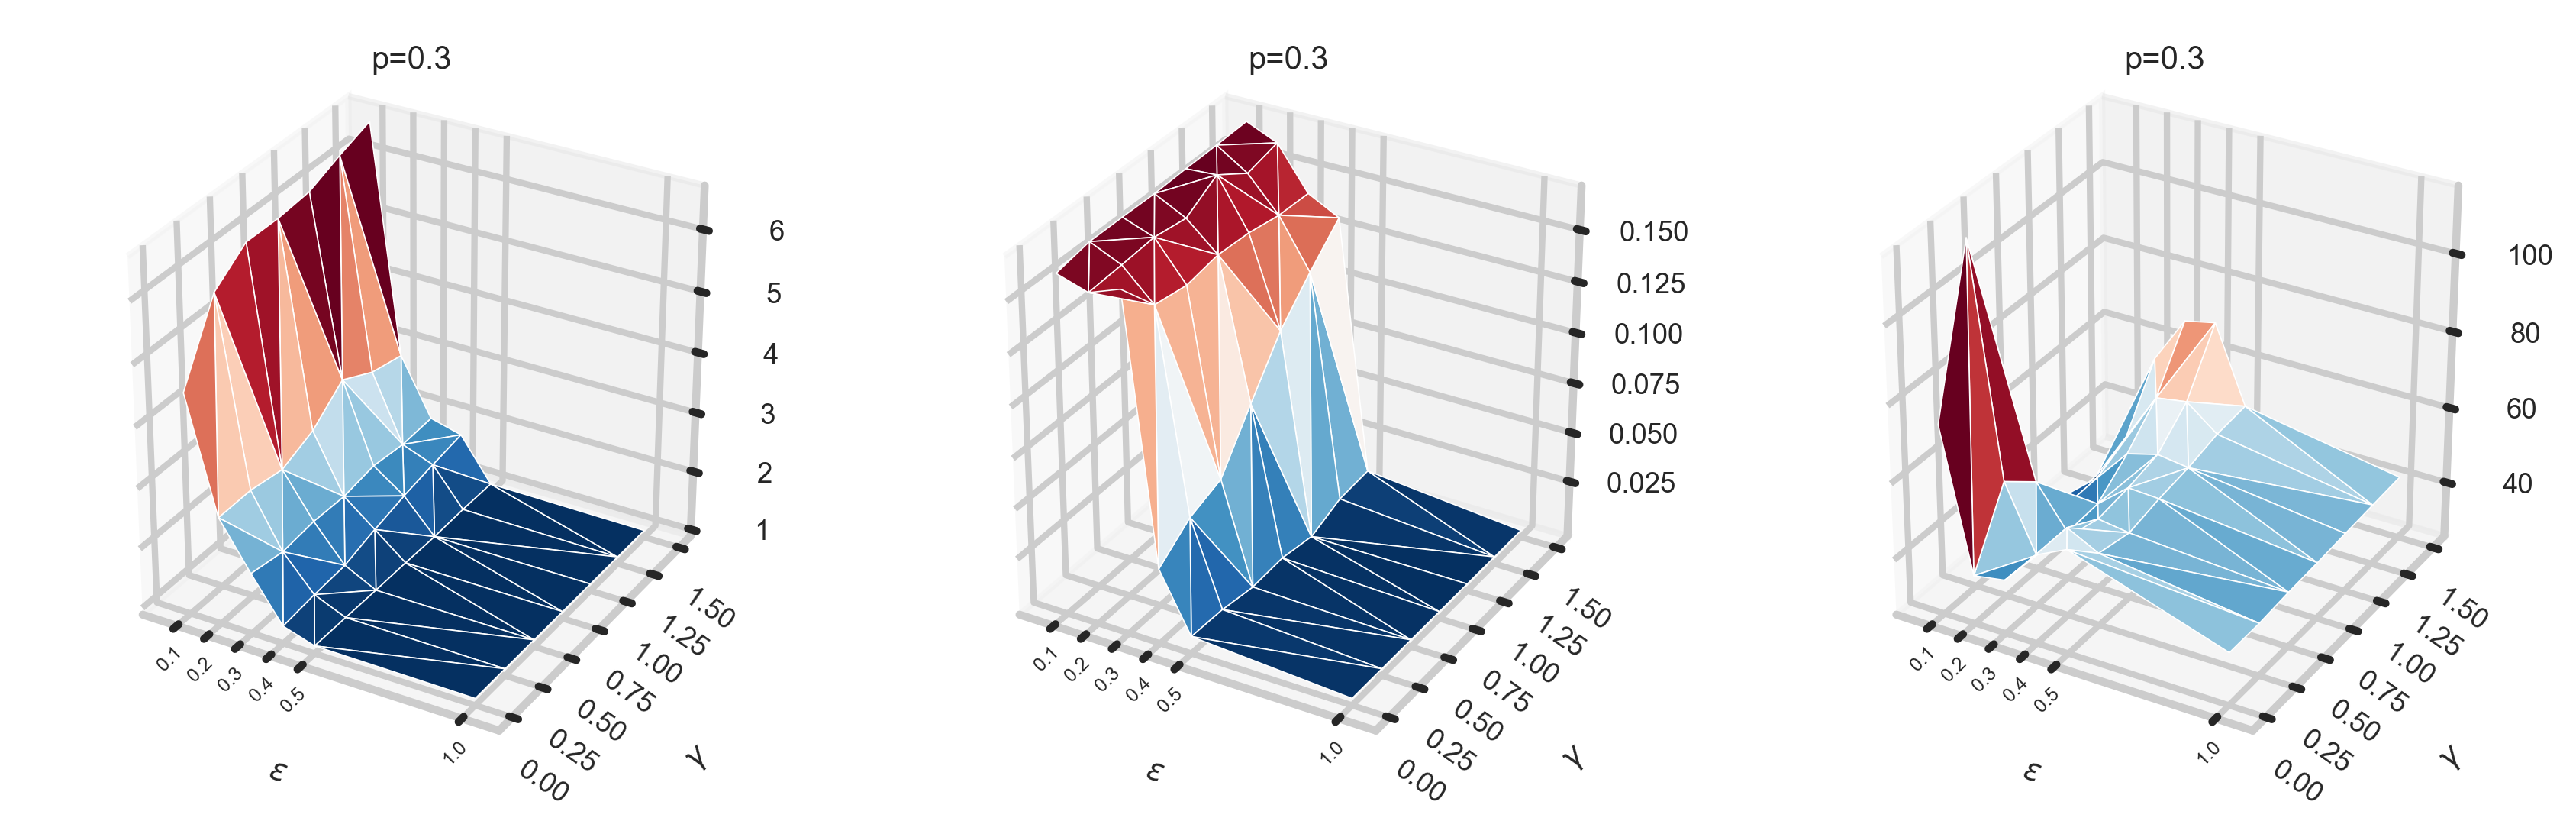

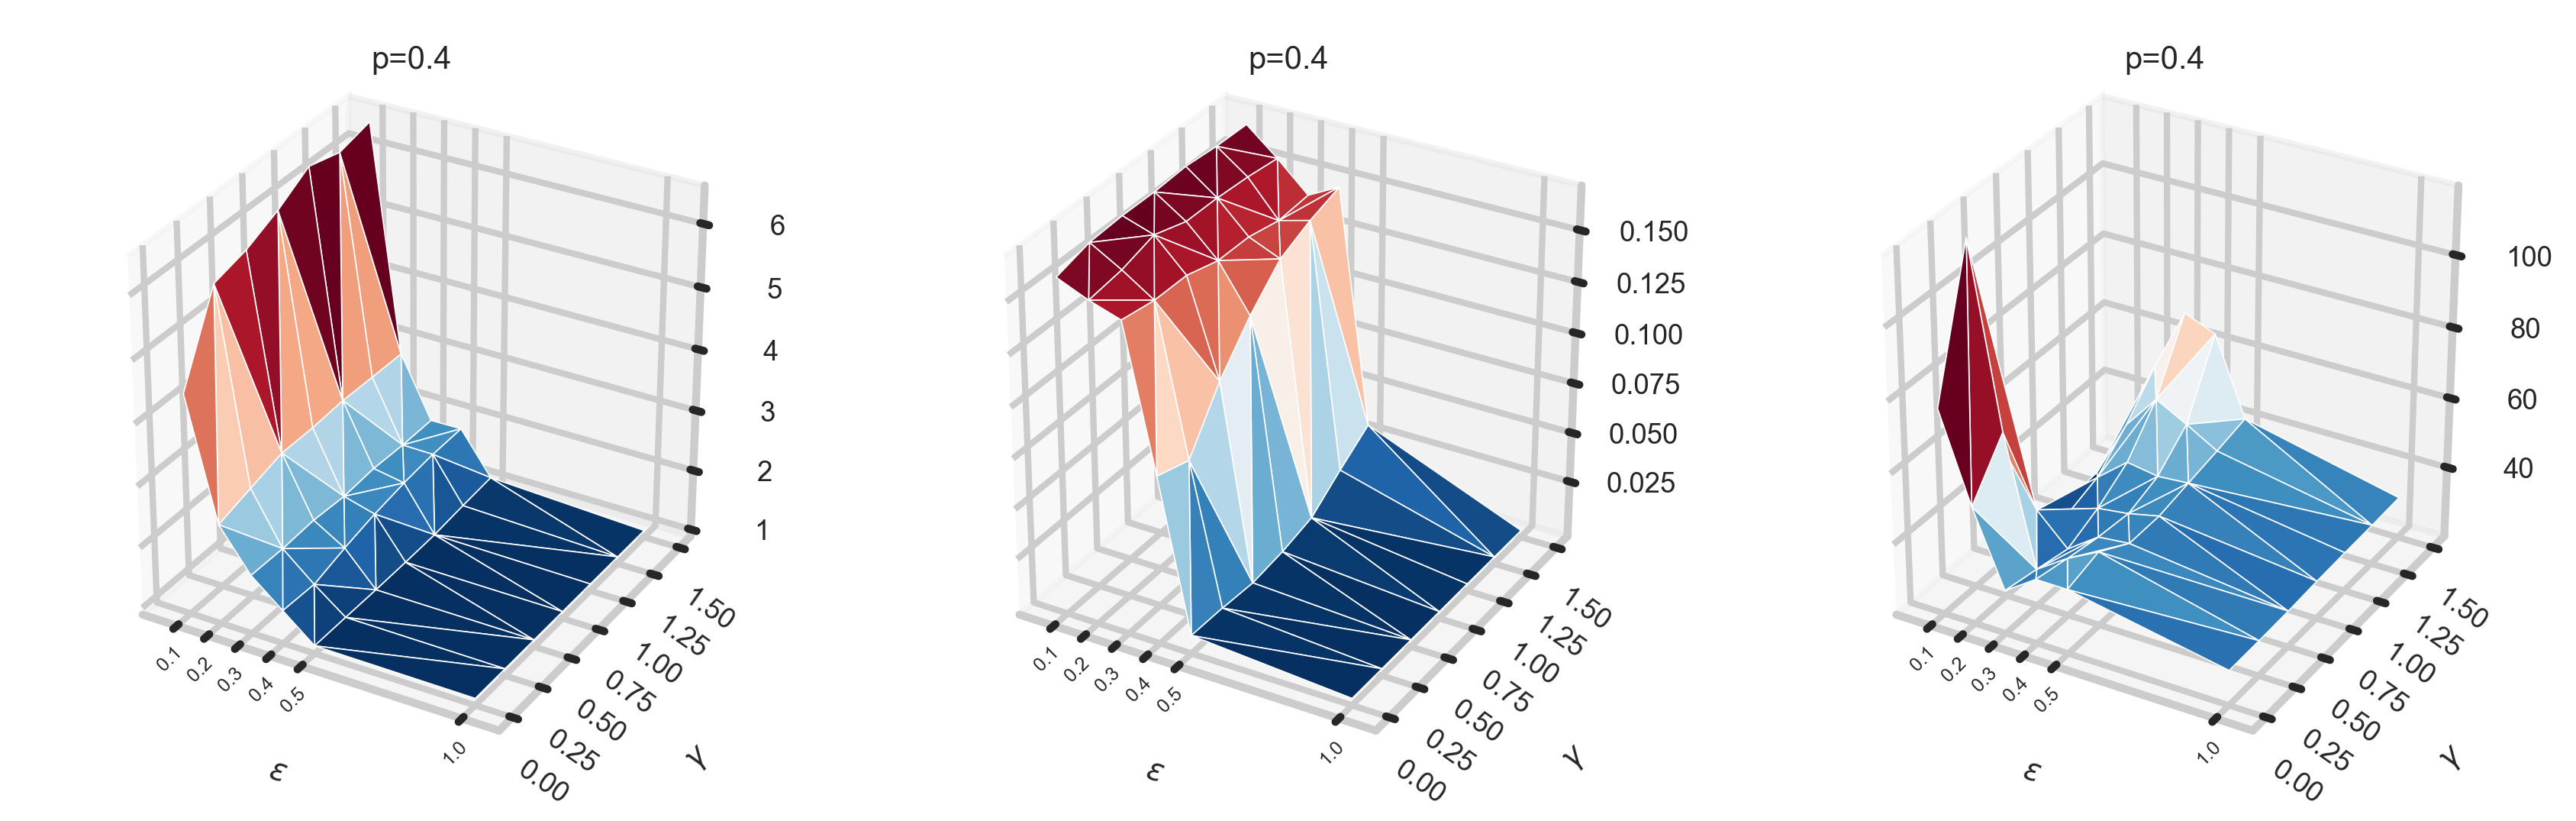

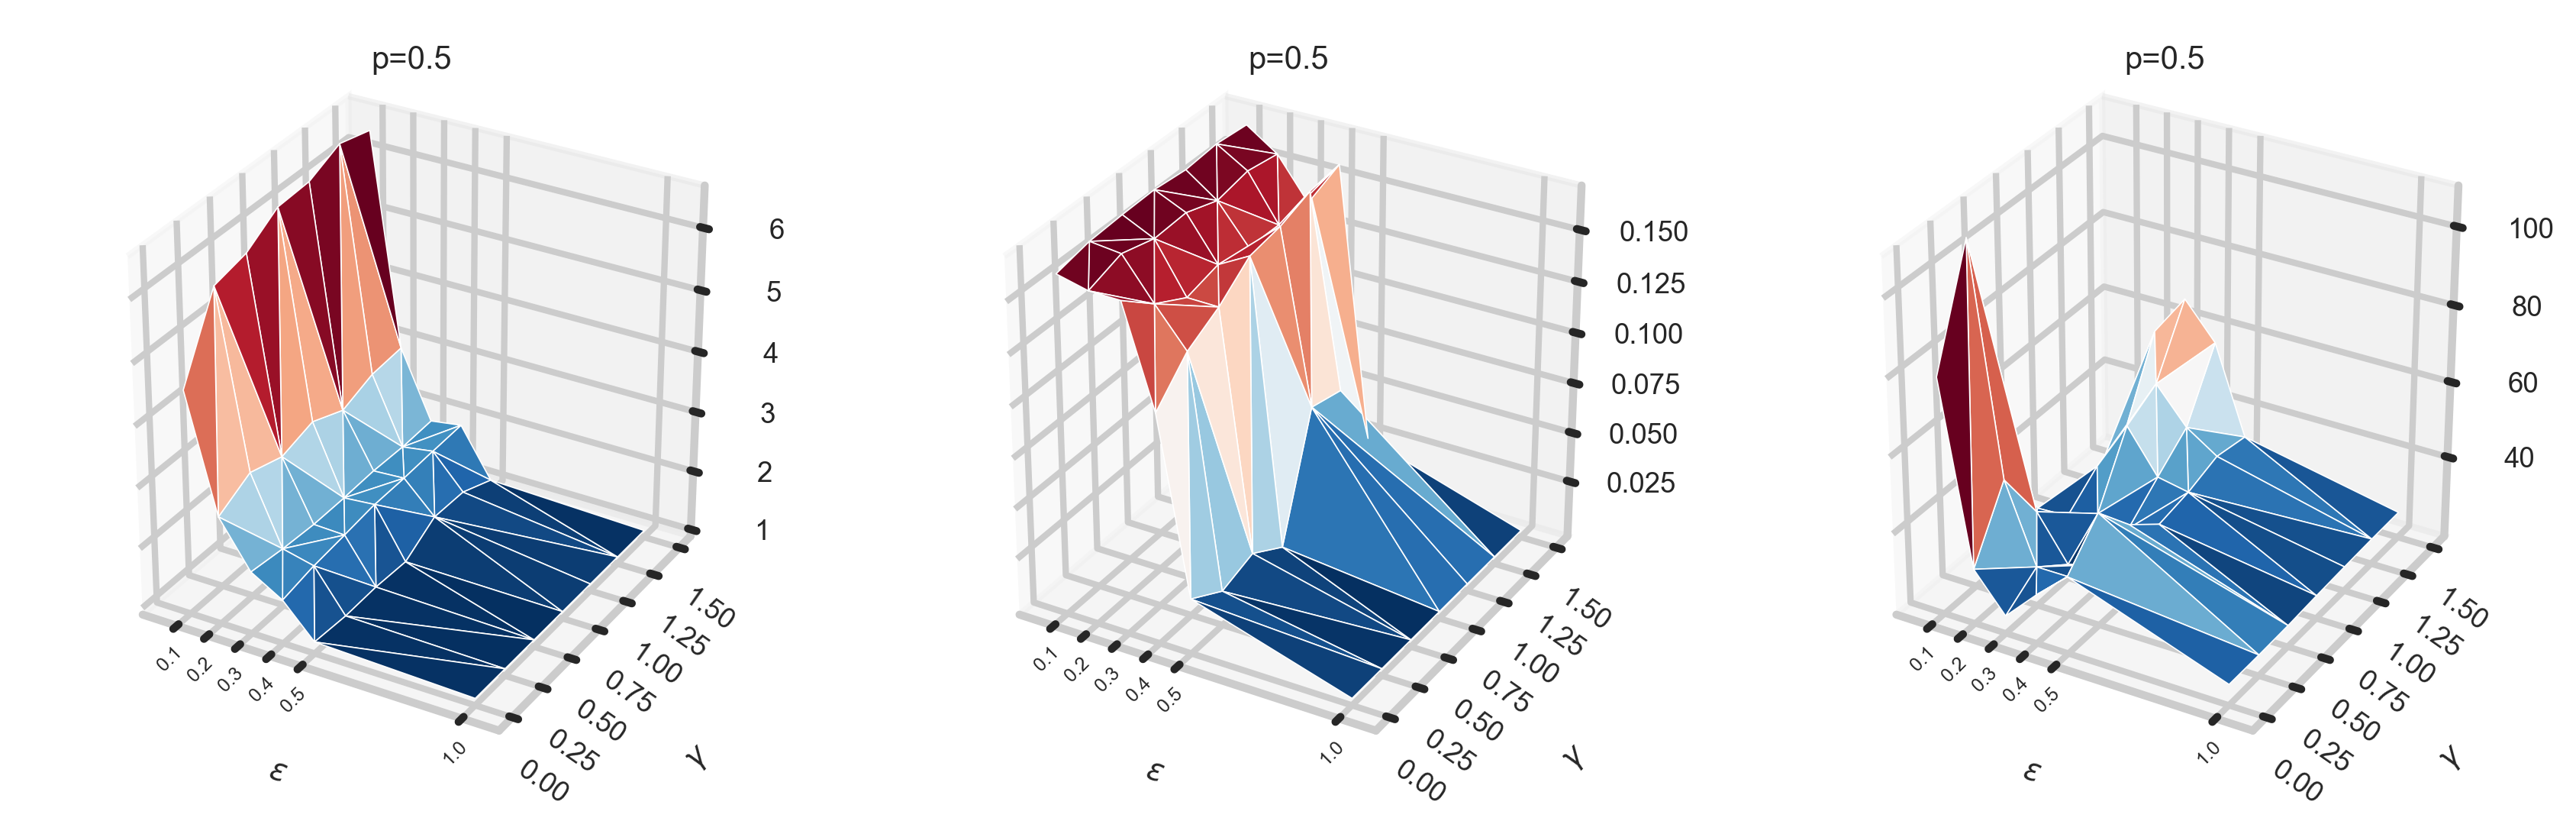

In [17]:
from mpl_toolkits.mplot3d import Axes3D
for p in onemedia.p_media.unique():
    trisurfplot(results, p)

In [41]:
from PIL import Image
path = "plots/"
for filename in os.listdir(path):
    if filename.endswith("nr1.png") and filename.startswith("evolution_plot"):
        im = Image.open(path+filename)
im.show()

saving spaghetti grid plot
saving spaghetti grid plot
saving spaghetti grid plot


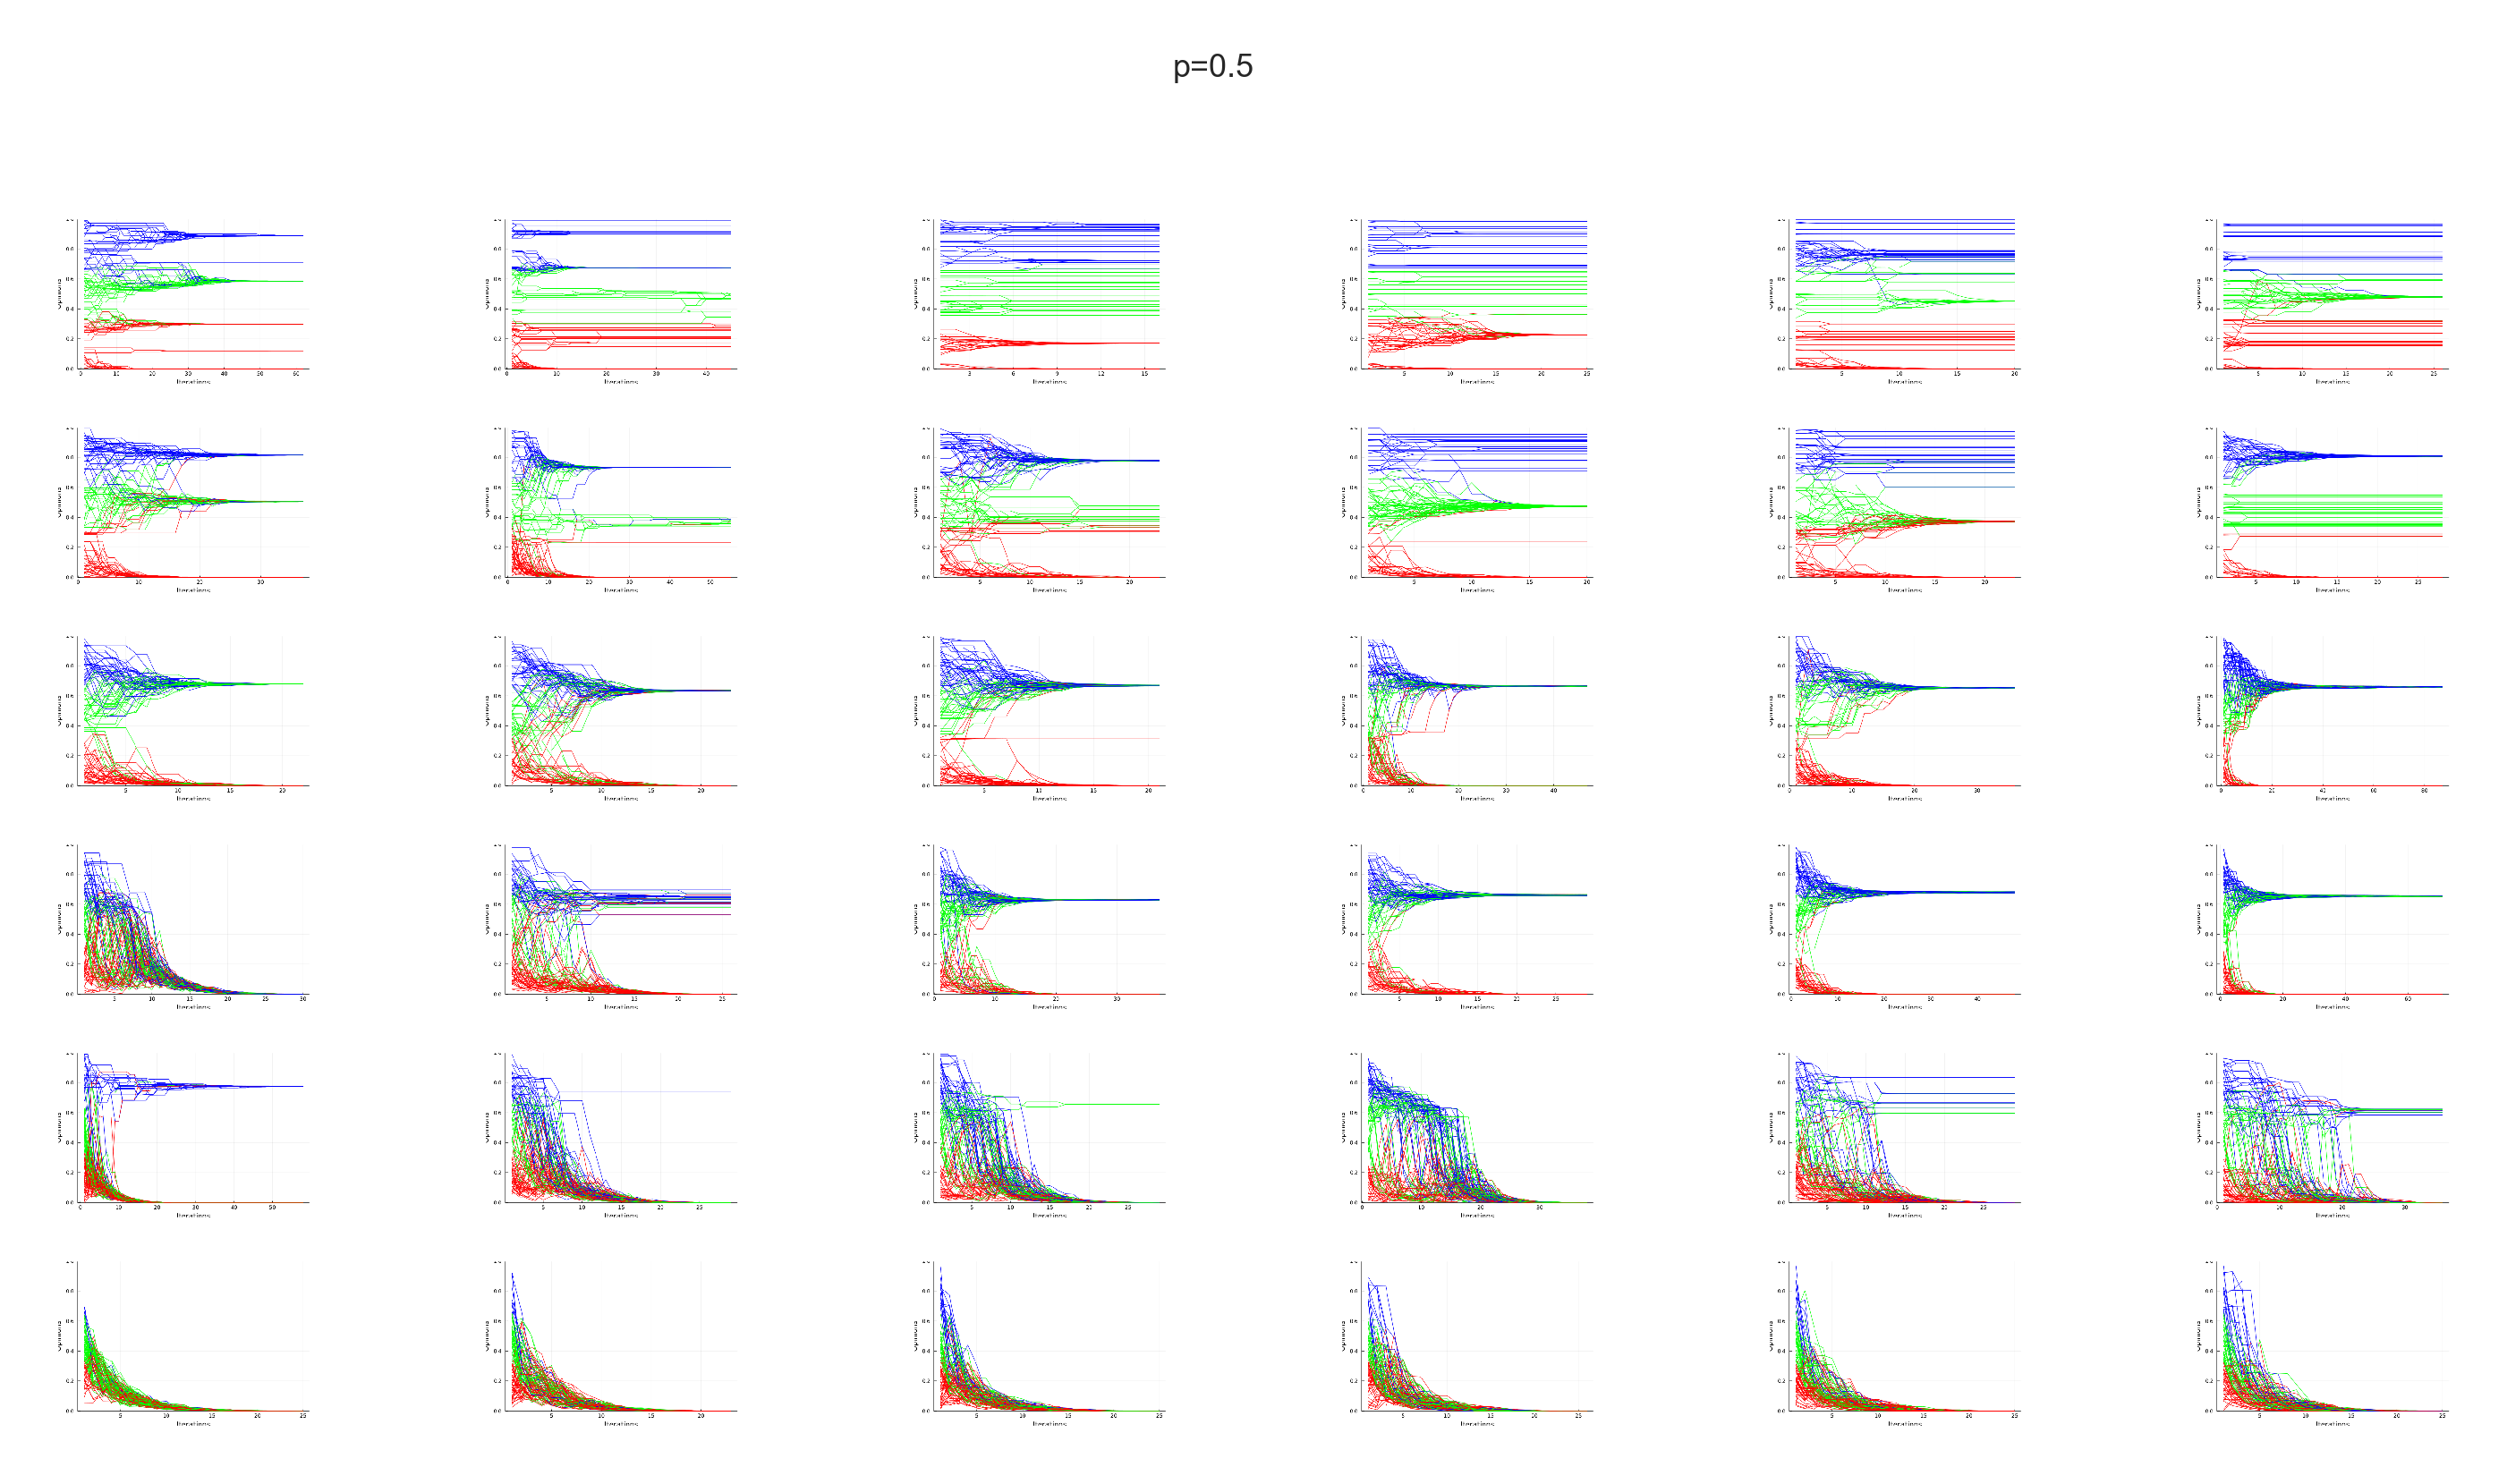

In [88]:
sns.set_theme(style="white")
sns.set_context("paper")
sns.set(font_scale=0.3)   
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(6, 3), dpi=600, sharey=True, sharex=True)
for p in [0.0, 0.3, 0.5]:
    row = 0
    for e in [0.1, 0.2, 0.3, 0.4, 0.5, 1.0]:
        col=0
        for g in [0.0, 0.5, 0.75, 1.0, 1.25, 1.5]: 
            filename = "evolution_plot media mo[0.0] p{} e{} g{} gm{} mi1000000 nr1.png".format(p, e, g, g)
            image = plt.imread(path+filename)
            im = axes[row, col].imshow(image)
            ax = plt.gca()
            ax.set_xticks([])
            ax.set_yticks([])
            ax.grid(visible=None)
            col+=1
        row+=1
    print("saving spaghetti grid plot")
    fig.suptitle("p={}".format(p))
    plt.savefig("plots/evolution_grid media mo[0.0] p{}.png".format(p))

In [106]:
import json
from scipy.stats import differential_entropy
import numpy as np

#compute entropy
def entropy(p, e, g):
    if os.path.isfile("aggregate/final_opinions media mo[0.0] p{} e{} g{} gm{} mi1000000.json".format(p,e,g,g)):
        infile = open("aggregate/final_opinions media mo[0.0] p{} e{} g{} gm{} mi1000000.json".format(p,e,g,g))
        filedict = json.load(infile)  # parse and transform data        
        entropy_arr = []
        for run in filedict.keys():
            opinions = list(filedict[run])
            entropy = differential_entropy(opinions)
            entropy_arr.append(entropy)
        entropy_arr = np.array(entropy_arr)
        avg_entr = np.average(entropy_arr)
        std_entr = np.std(entropy_arr)
        return avg_entr, std_entr
    else:
        return None, None

def write_entropy():
    with open("aggregate/aggregate_entropy.csv", "w") as ofile:
        header = "n,density,eps,gam,gam_media,p_media,max_it,media_op,avg_entropy,std_entropy\n"
        ofile.write(header)
        for pm in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:
            for e in [0.1, 0.2, 0.3, 0.4, 0.5, 1.0]:
                for g in [0.0, 0.5, 0.75, 1.0, 1.25, 1.5]:
                    avg_entr, std_entr = entropy(p, e, g)
                    ofile.write("100,1.0,{},{},{},{},1000000,[0.0],{},{}\n".format(e,g,g,p,avg_entr,std_entr))
                    
        
write_entropy()

